In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Uber Request Data.csv")

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
len(df["Request id"].unique())

6745

In [5]:
df.shape

(6745, 6)

In [6]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [8]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [10]:
df["Request timestamp"]=df['Request timestamp'].replace('/','-')

In [11]:
df["Request timestamp"]

0      2016-07-11 11:51:00
1      2016-07-11 17:57:00
2      2016-07-12 09:17:00
3      2016-07-12 21:08:00
4      2016-07-13 08:33:16
               ...        
6740   2016-07-15 23:49:03
6741   2016-07-15 23:50:05
6742   2016-07-15 23:52:06
6743   2016-07-15 23:54:39
6744   2016-07-15 23:55:03
Name: Request timestamp, Length: 6745, dtype: datetime64[ns]

In [12]:
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [13]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

In [14]:
import datetime as dt

In [15]:
req_hour=df["Request timestamp"].dt.hour

In [16]:
df["req_hour"]=req_hour

In [17]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


In [18]:
req_day=df["Request timestamp"].dt.day

In [19]:
df["req_day"]=req_day

In [20]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [21]:
import seaborn as sns

In [22]:
import matplotlib.pyplot as plt

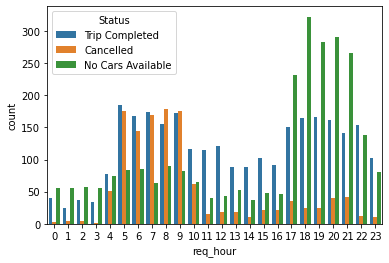

In [23]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


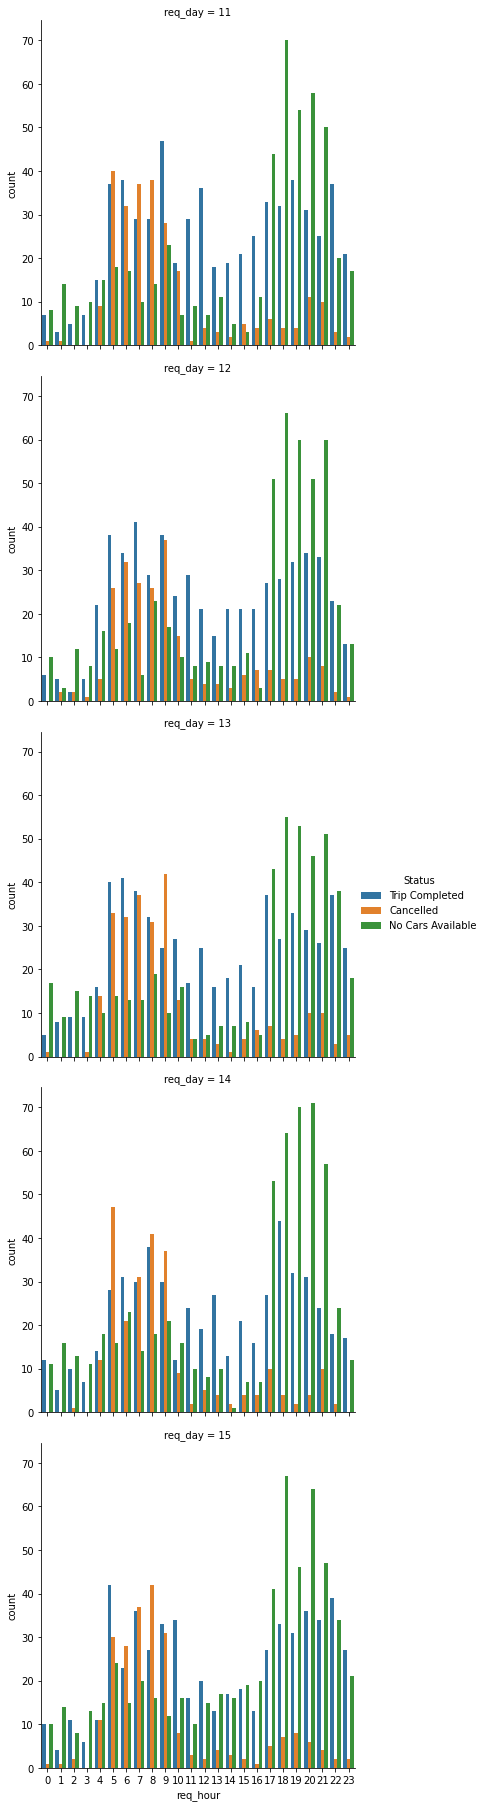

In [24]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


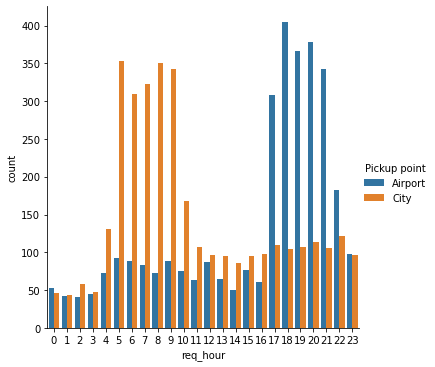

In [25]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

In [26]:
df["Time_slot"]=0

In [27]:
j=0
for i in df["req_hour"]:
    if df.iloc[j,6]<5:
        df.iloc[j,8]="Pre_morning"
    elif 5<=df.iloc[j,6]<10:
        df.iloc[j,8]="Morning Rush"
        
    elif 10<=df.iloc[j,6]<17:
        df.iloc[j,8]="Day_time"
        
    elif 17<=df.iloc[j,6]<22:
        df.iloc[j,8]="Evening rush"
    else:
        df.iloc[j,8]="Late night"
    j=j+1
            

In [28]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late night


In [29]:
df["Time_slot"].value_counts()

Evening rush    2342
Morning Rush    2103
Day_time        1224
Pre_morning      578
Late night       498
Name: Time_slot, dtype: int64

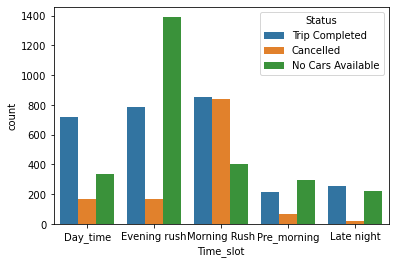

In [30]:
sns.countplot(x="Time_slot",hue="Status",data=df)
plt.show()

In [31]:
df_morning_rush=df[df["Time_slot"]=="Morning Rush"]

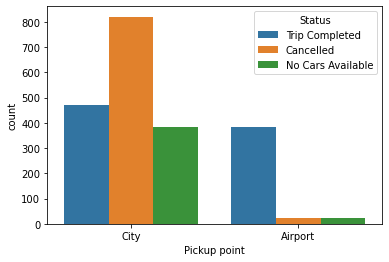

In [32]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)
plt.show()

# Severity of problem by location and their count (cancellation of cabs as per the pickup location rush hours

In [37]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [38]:
df_airport_cancelled.shape[0]

23

In [42]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [43]:
df_city_cancelled.shape[0]

820

# Supply and demand

In [45]:
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning Rush


# Morning Rush- City

In [44]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [49]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [71]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [73]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

# Morning Rush- Airport

In [50]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [51]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [74]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [75]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

# Evening Rush- Overview

In [52]:
df_evening_rush=df[df["Time_slot"]=="Evening rush"]

In [53]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

In [54]:
df_city_cancelled.shape[0]

60

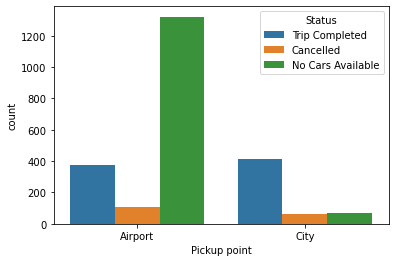

In [60]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush);

In [62]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

# Evening Rush- City

In [63]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=='City')].shape[0]

542

In [64]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=='City') & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

In [76]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=='City') & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [78]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=='City') & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

# Evening Rush- Airport

In [65]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [67]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [79]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [80]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

# Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [69]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [70]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

# Pie chart

In [102]:
df_morning_city=df.loc[(df["Pickup point"]=="City") & (df["Time_slot"]=="Morning Rush")]

In [103]:
df_morning_city

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning Rush


In [104]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())

In [105]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [91]:
df["Status"].values

array(['Trip Completed', 'Trip Completed', 'Trip Completed', ...,
       'No Cars Available', 'No Cars Available', 'No Cars Available'],
      dtype=object)

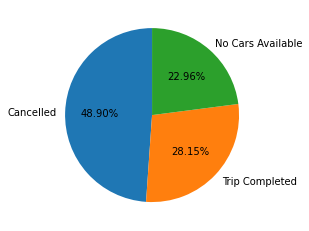

In [106]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

# Pie chart- Evening rush Airport

In [109]:
df_evening_airport=df.loc[(df["Pickup point"]=="Airport") & (df["Time_slot"]=="Evening rush")]

In [110]:
df_evening_airport

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening rush
19,960,Airport,3.0,Trip Completed,2016-07-11 18:45:00,2016-07-11 19:23:00,18,11,Evening rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening rush


In [111]:
df_evening_airport_count=pd.DataFrame(df_evening_airport["Status"].value_counts())

In [113]:
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [114]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

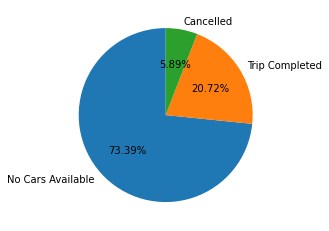

In [115]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels=df_evening_airport_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

**Inferences**